# Constant Q-transform with LIBROSA

We will perform a constant Q-transform of GW data segments using the implementation in the Librosa audio signal processing library. 

In [2]:
import os
import librosa
import librosa.display
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from pathlib import Path

In [3]:
print(np.__version__)
print(matplotlib.__version__)
print(h5py.__version__)
print(librosa.__version__)

1.23.5
3.6.2
3.7.0
0.9.2


Edit the notebook called 'nogit_datainfo.ipynb' to expose the required input file name. In that notebook, one can also edit the time interval over which to perform the Q-transform along with the threshold to use on the pixel values for displaying it. 

* Note: Do not commit the notebook to Git, but the corresponding .py script that is created each time this notebook is saved (checkpointed). Use the save icon in the ribbon for checkpointing. Everytime the notebook is checkpointed, the corresponding .py script will be updated but only if the cells have changed, not their output.

In [ ]:
%run nogit_datainfo.ipynb
#Figure file type
figFileType = 'png'

In [4]:
datadir = '/Users/raghav/Desktop/'
glitchdir = datadir + 'GLITCH/'
fileName = 'H-H1_GWOSC_O2_4KHZ_R1-1164906496-4096_Whtndhpassed.hdf5'

filepath = glitchdir + fileName

#Figure file type
figFileType = 'png'

In [5]:
fileHndl = h5py.File(fileName)
strainDset = np.array(fileHndl['strain/Strain'])

In [35]:
timeVec = np.linspace(1,4096,np.shape(strainDset)[1]).reshape(1,np.shape(strainDset)[1])

In [52]:
#Select data range to do Q transform on
start = 2000
end = 2500
# dataRange = list(range(360*4096,372*4096,1))
dataY = strainDset[0,start*4096:end*4096]

## CQT settings

In [48]:
#sampling rate of input data
sr = 4096 #Hz
#number of samples between successive CQT columns.
hop_length = 16 
#Minimum frequency. Defaults to C1 ~= 32.70 Hz
fmin  = 30 # Hz
#Maximum frequency (should be power of 2)
fmax = 1024 #Hz
#Number of bins per octave
bins_per_octave =16

In [53]:
#Number of frequency bins, starting at fmin
n_bins = int(bins_per_octave*math.log2(fmax/fmin))

dataCQT = librosa.cqt(dataY, sr=sr, hop_length=hop_length, n_bins=n_bins, \
                      bins_per_octave=bins_per_octave, fmin=fmin)
#print(dataCQT.shape)
dataCQT = np.abs(dataCQT);

In [54]:
CQTThresh = 10
dataCQTThresh = dataCQT
dataCQTThresh[dataCQT>CQTThresh]=CQTThresh

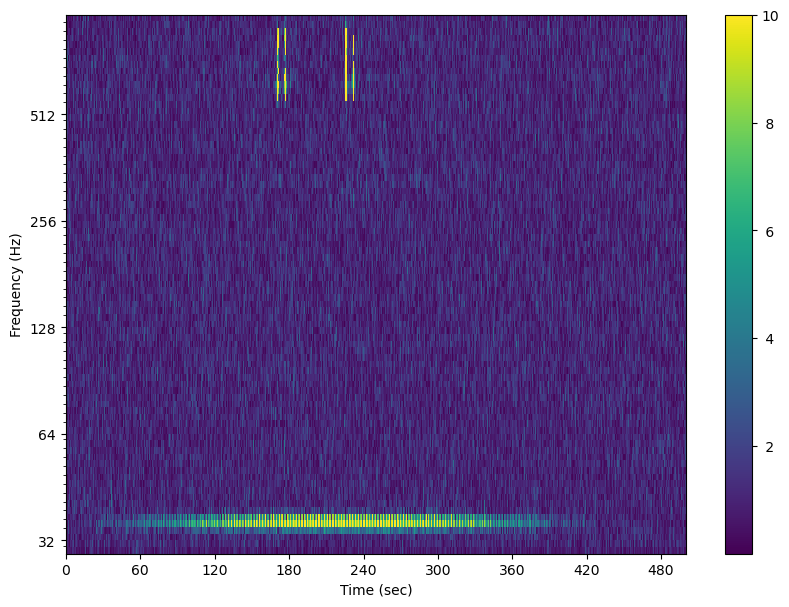

In [56]:
matplotlib.rcParams['figure.figsize'] = [10, 7]
fig, ax = plt.subplots()
img = librosa.display.specshow(dataCQTThresh,sr=sr, hop_length=hop_length, \
                               bins_per_octave=bins_per_octave, \
                               fmin=fmin, x_axis='s',y_axis='cqt_hz',ax=ax)
img.set_cmap(matplotlib.colormaps['viridis'])
fig.colorbar(
    mappable=img,
    # mappable=matplotlib.cm.ScalarMappable(cmap=matplotlib.colormaps['viridis']),
    ax=ax, format="%2.0f")
plt.viridis()
ax.grid(False)
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Frequency (Hz)')
#ax.set_ylim(0, 512)
plt.show()
#Construct filename for the figure
#print(fileName)
figFileDir = os.path.dirname(fileName)
#print(figFileDir)
figFileName = Path(fileName).stem
#print(figFileName)
fig.savefig(figFileName+'_cqt.'+figFileType)

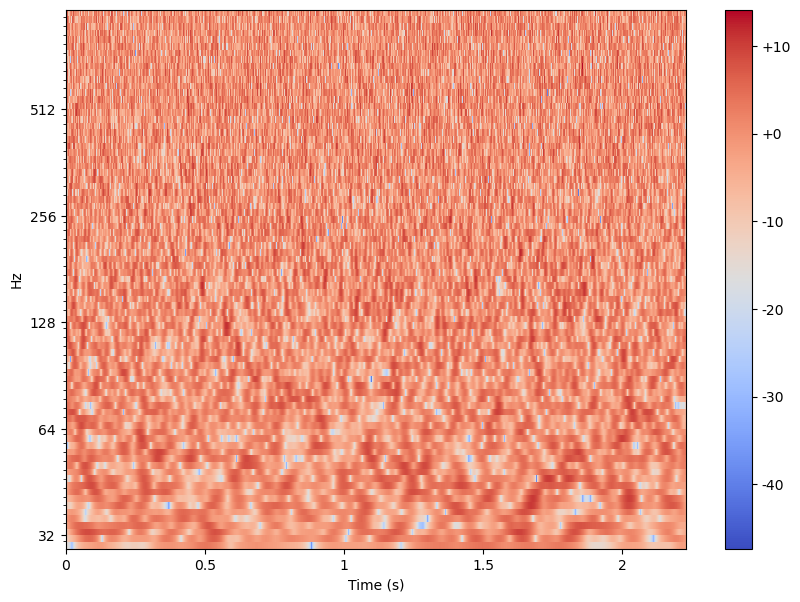

In [29]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(dataCQT),hop_length=hop_length, \
                               bins_per_octave=bins_per_octave, \
                               fmin=fmin, x_axis='s',y_axis='cqt_hz',ax=ax)
fig.colorbar(img, ax=ax, format="%+2.0f")
plt.show()